# Overview of Financial Modeling Yield Curve Objects

This notebook provides an overview of the main classes and objects used in the FM_yield_curve repository, explaining their purpose and relationships.

## Class Hierarchy Overview

The FM_yield_curve repository implements a structured, object-oriented approach to modeling financial instruments and yield curves. Here's a visual representation of the class hierarchy:

```
CashFlows
├── Bank_bill
├── Bond
└── Portfolio

ZeroCurve
└── YieldCurve
```

Let's explore each class in detail.

## 1. CashFlows Class

**Purpose**: The fundamental base class that represents a series of cash flows occurring at specific points in time (maturities).

**Key Attributes**:
- `maturities`: List of time points when cash flows occur
- `amounts`: List of cash flow amounts (corresponding to each maturity)

**Key Methods**:
- `add_cash_flow(maturity, amount)`: Adds a new cash flow
- `get_cash_flow(maturity)`: Retrieves a specific cash flow amount
- `get_maturities()`, `get_amounts()`, `get_cash_flows()`: Retrieve cash flow data

**Role in the System**: Serves as the foundation for all financial instruments that have temporal payment structures.

## 2. Bank_bill Class

**Purpose**: Represents a short-term debt instrument with a single payment at maturity.

**Inheritance**: Inherits from `CashFlows`

**Key Attributes**:
- `face_value`: The nominal amount paid at maturity
- `maturity`: Time until payment (in years)
- `ytm`: Yield to maturity (annualized return)
- `price`: Current market price

**Key Methods**:
- Setters and getters for all attributes
- `set_ytm(ytm)`: Sets yield and recalculates price
- `set_price(price)`: Sets price and recalculates yield
- `set_cash_flows()`: Configures the cash flow structure (initial -price, final +face_value)

**Role in the System**: Used for modeling short-term rates and as building blocks for bootstrapping the short end of yield curves.

## 3. Bond Class

**Purpose**: Represents a fixed-income security with periodic coupon payments and return of principal at maturity.

**Inheritance**: Inherits from `CashFlows`

**Key Attributes**:
- `face_value`: The nominal amount paid at maturity
- `maturity`: Time until final payment (in years)
- `coupon`: Annual coupon rate as a decimal (e.g., 0.05 for 5%)
- `frequency`: Number of coupon payments per year
- `ytm`: Yield to maturity
- `price`: Current market price

**Key Methods**:
- Setters and getters for all attributes
- `set_ytm(ytm)`: Sets yield and recalculates price using bond pricing formula
- `set_cash_flows()`: Configures the cash flow structure (initial -price, periodic coupons, final principal+coupon)

**Role in the System**: Used for modeling medium to long-term interest rates and as building blocks for constructing yield curves beyond the short-term segment.

## 4. Portfolio Class

**Purpose**: Represents a collection of financial instruments (Bonds and Bank_bills).

**Inheritance**: Inherits from `CashFlows`

**Key Attributes**:
- `bonds`: List of Bond objects
- `bank_bills`: List of Bank_bill objects

**Key Methods**:
- `add_bond(bond)`: Adds a Bond to the portfolio
- `add_bank_bill(bank_bill)`: Adds a Bank_bill to the portfolio
- `get_bonds()`, `get_bank_bills()`: Retrieve portfolio components
- `set_cash_flows()`: Aggregates all cash flows from contained instruments

**Role in the System**: Acts as a container for instruments and can consolidate cash flows across different securities. Used by the YieldCurve class for bootstrapping.

## 5. ZeroCurve Class

**Purpose**: Represents a zero-coupon yield curve, which maps maturities to interest rates.

**Key Attributes**:
- `maturities`: List of time points
- `zero_rates`: Corresponding zero-coupon interest rates
- `AtMats`: Accumulation factors at different maturities
- `discount_factors`: Discount factors for each maturity

**Key Methods**:
- `add_zero_rate(maturity, zero_rate)`: Adds a zero rate and calculates corresponding values
- `add_discount_factor(maturity, discount_factor)`: Adds a discount factor and calculates corresponding values
- `get_AtMat(maturity)`, `get_discount_factor(maturity)`, `get_zero_rate(maturity)`: Retrieval methods with interpolation for non-explicit maturities
- `npv(cash_flows)`: Calculates net present value of a CashFlows object

**Role in the System**: Provides the term structure of interest rates and tools for discounting future cash flows to present value.

## 6. YieldCurve Class

**Purpose**: Extends ZeroCurve with bootstrapping capability to construct a yield curve from market instruments.

**Inheritance**: Inherits from `ZeroCurve`

**Key Attributes**:
- `portfolio`: Portfolio of instruments used for bootstrapping

**Key Methods**:
- `set_constituent_portfolio(portfolio)`: Sets the portfolio of instruments for bootstrapping
- `bootstrap()`: Constructs the yield curve from the portfolio instruments

**Role in the System**: Provides the machinery to construct a complete yield curve from market-observable instruments by iteratively solving for rates.

## 7. Helper Function: exp_interp

**Purpose**: Performs exponential interpolation for continuously compounded rates.

**Parameters**:
- `xs`: Vector of x values (maturities)
- `ys`: Vector of y values (rates/factors)
- `x`: The x value to interpolate

**Role in the System**: Used by the ZeroCurve class to interpolate rates between known maturities, ensuring smooth and theoretically sound rate transitions.

## Object Relationships

The classes in the FM_yield_curve repository form a cohesive system with the following key relationships:

1. **Inheritance Relationships**:
   - `Bank_bill`, `Bond`, and `Portfolio` inherit from `CashFlows`
   - `YieldCurve` inherits from `ZeroCurve`

2. **Composition Relationships**:
   - `Portfolio` contains collections of `Bond` and `Bank_bill` objects
   - `YieldCurve` references a `Portfolio` for bootstrapping

3. **Functional Relationships**:
   - `ZeroCurve` can calculate NPV of any `CashFlows` object
   - `YieldCurve` bootstraps itself using information from `Portfolio` instruments

4. **Data Flow**:
   - Financial instruments (Bank_bills, Bonds) ➔ Portfolio ➔ YieldCurve ➔ Discount Factors/Zero Rates

## Typical Usage Flow

1. Create bond and bank bill instances with market data
2. Add them to a Portfolio
3. Create a YieldCurve
4. Set the Portfolio as the constituent portfolio for the YieldCurve
5. Call bootstrap() to construct the zero curve
6. Use the curve for pricing, risk analysis, or forecasting

This flow is demonstrated in the repository's Jupyter notebooks, particularly in `3_yield_curve_working.ipynb`.

### The diagram below shows the first 5 of these usage types diagramatically.

In this diagram "uses" means that one class is being used to create an object (instantiate) of the other class.
- For example, a Portfolio object is used to create a YieldCurve object

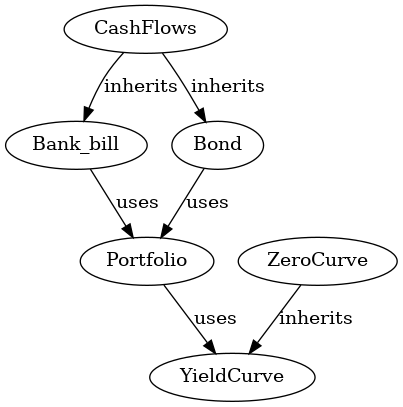

In [11]:
from graphviz import Digraph
from IPython.display import Image

# Create the diagram
dot = Digraph()

# Define classes
dot.node("CashFlows", "CashFlows")
dot.node("Bank_bill", "Bank_bill")
dot.node("Bond", "Bond")
dot.node("ZeroCurve", "ZeroCurve")
dot.node("YieldCurve", "YieldCurve")
dot.node("Portfolio", "Portfolio")

# Define relationships
dot.edge("CashFlows", "Bank_bill", label="inherits")
dot.edge("CashFlows", "Bond", label="inherits")
dot.edge("ZeroCurve", "YieldCurve", label="inherits")
dot.edge("Bank_bill", "Portfolio", label="uses")
dot.edge("Bond", "Portfolio", label="uses")
dot.edge("Portfolio", "YieldCurve", label="uses")

# Render the diagram to a file
diagram_path_write = "class_diagram"
dot.render(diagram_path_write, format="png", cleanup=True)

# Display the diagram in the notebook
Image(diagram_path_write + ".png")

## Summary

The FM_yield_curve repository provides a comprehensive object-oriented framework for modeling financial instruments and yield curves. The design follows good OOP principles:

1. **Separation of Concerns**: Each class has a distinct responsibility
2. **Inheritance Hierarchy**: Common functionality is implemented in base classes
3. **Encapsulation**: Implementation details are hidden behind clear interfaces
4. **Composition**: Complex objects are built from simpler ones

This architecture makes the code maintainable, extensible, and aligned with financial theory and practice.